# Temel Kavramlar

**Makine Öğrenmesi Nedir?**

* Bilgisayarların insanlara benzer şekilde öğrenmesini sağlamak maksadıyla çeşitli algoritma ve tekniklerin geliştirimesi için çalışılan bilimsel çalışma alanıdır.

**Değişken Türleri**

* Sayısal Değişkenler (Kesikli, Sürekli)
* Kategorik Değişkenler (Nominal, Ordinal)

---
* Bağımlı Değişken (target, dependent, output, response)
* Bağımsız Değişken (feature, independent, input, column, predictor, explanatory)

---

**Öğrenme Türleri (Leaning Types)**

> 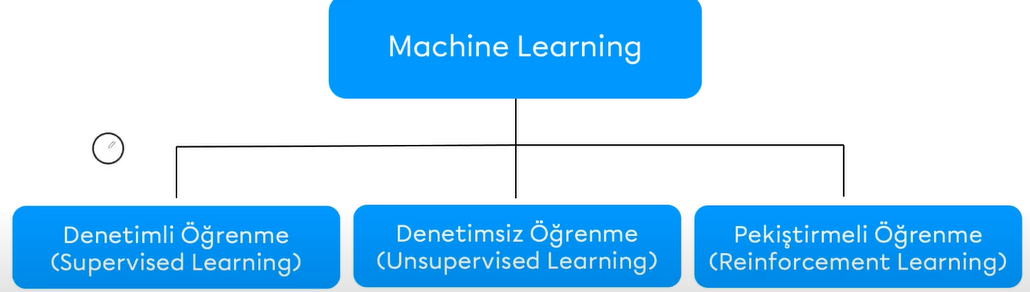

* Data içerisinde "Target" değişken yer alıyorsa bu 'Supervised Learning'tir. 
* Data içerisinde "Target" değişken yok ise sadece bağımsız değişkenler var ise "Unsupervised Learning"tir. 

---

**Model Başarı Değerlendirme Yöntemleri**

* Tahminlerim ne kadar başarılı?

>> 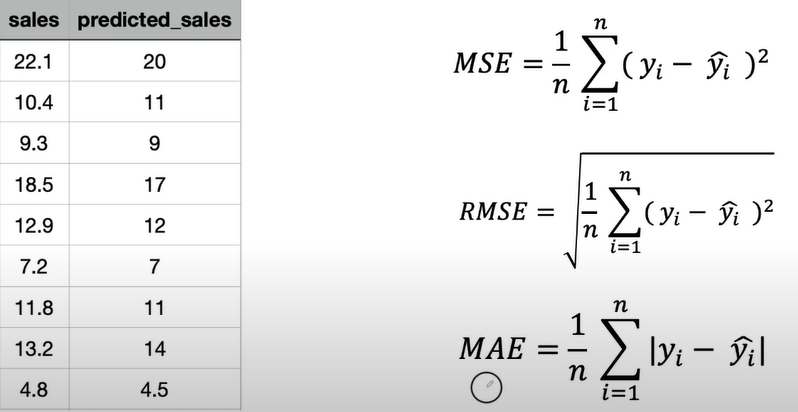

> **MSE:** Datamızdaki her bağımlı değer ile tahmin ettiğimiz değer arasındaki farkın toplamlarının karesinin ortalamasıdır.  
> **RMSE:** MSE değerinin karekökü alınarak elde edilir.   
> **MAE:** Gerçek değerler ile tahmin edilen değerler arasındaki mutlak farkın toplamının ortalamasıdır.  

---

* Sınıflandırma problemleri için;
>> 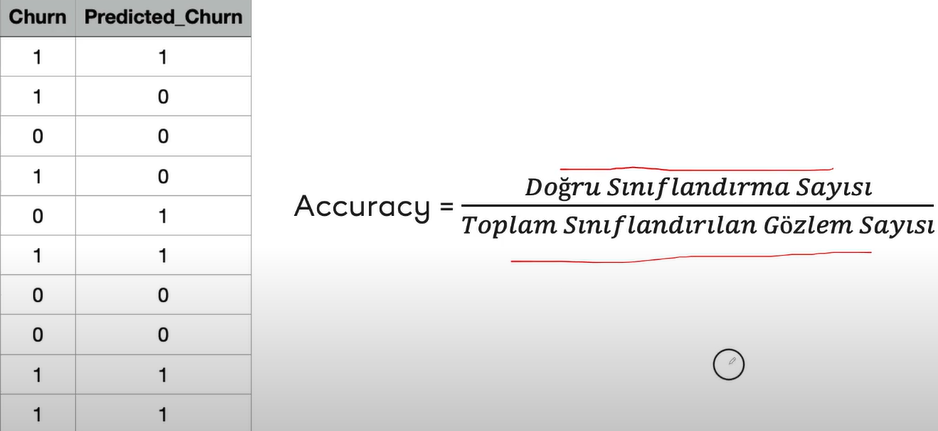

> **Accuracy:** Yüzde kaçını doğru tahmin etmişim.  


---

**Model Doğrulama (Validation) Yöntemleri**

**Holdout Yöntemi** 

>> 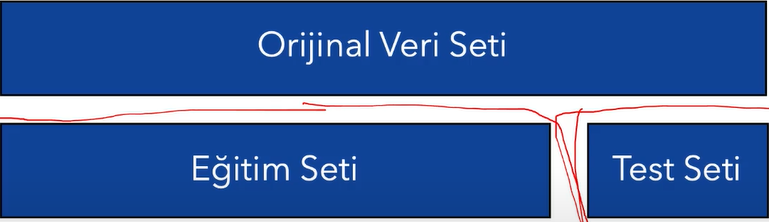 

**K-Katlı Çapraz Doğrulama (K Fold Cross Validation)**  

>> 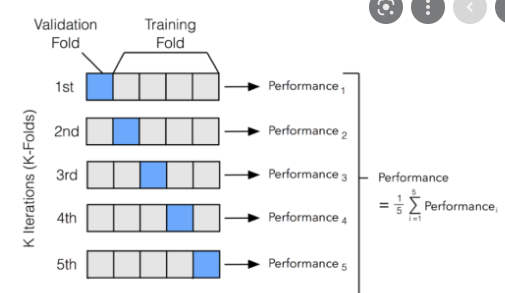  

---

**Yanlılık-Varyans Değiş Tokuşu (Bias-Variance Tradeoff)**

>>> 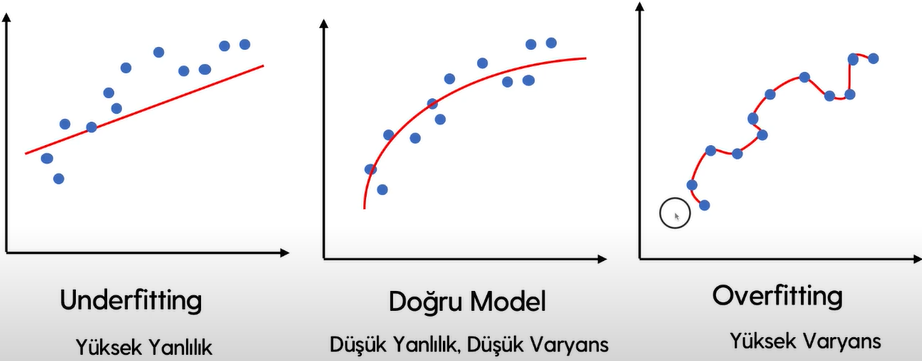

* Overfitting veya Underfitting önlemek için;  

>>>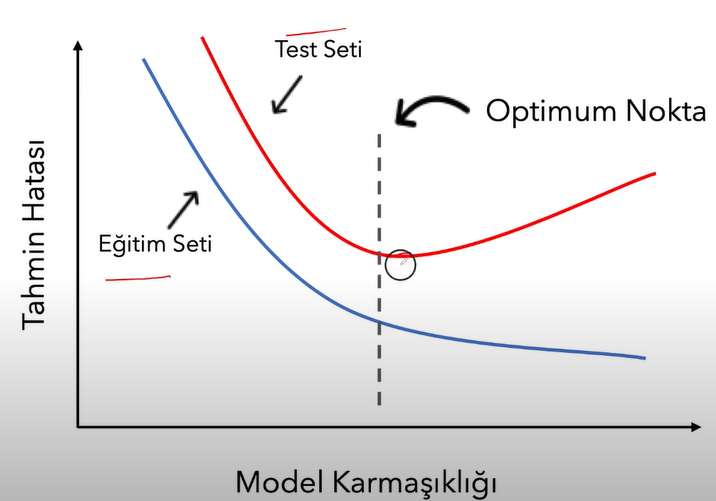

# Doğrusal (Linear) Regresyon 

* Amaç, bağımlı ve bağımsız değişkenler arasındaki ilişkiyi doğrusal olarak modellemektir. 

>> 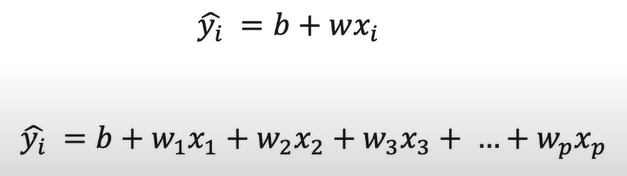

* Amaç ilgili değişkenlerin etkilerini (ağırlıklarını) ve katsayıyı bulmaktır. 
* "w"ler ağırlıkları (katsayıları) ve "b" sabit sayıyı temsil eder. 
* Modelleme sonucu ağırlıkları ve sabit sayıyı elde ederiz.

## Regresyon Modellerinde Başarı Değerlendirme (MSE, RMSE, MAE)

>>> 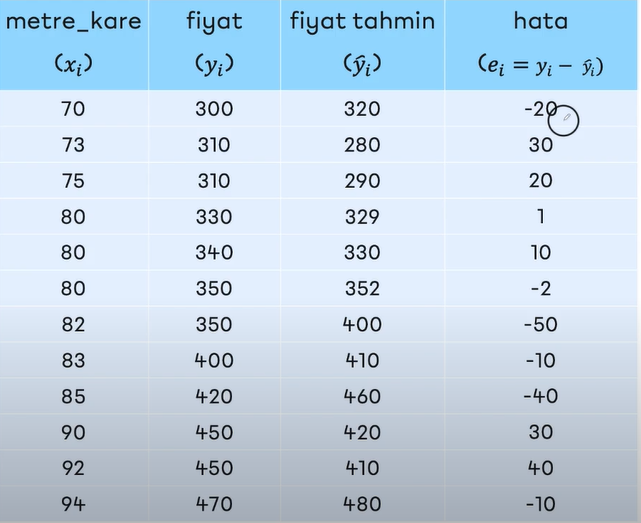

* **MSE:** 

>>>> 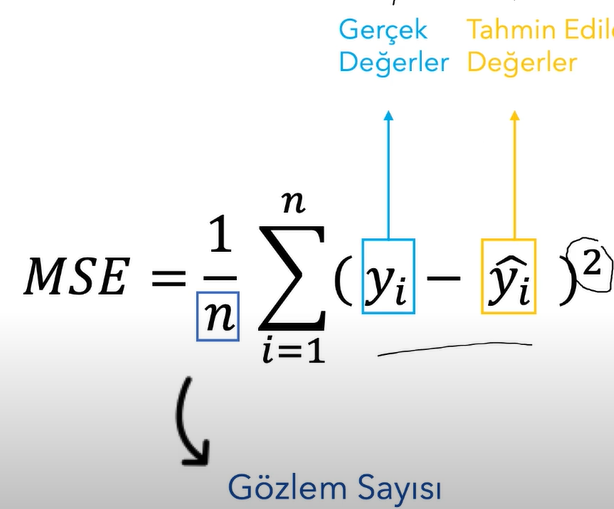

* **RMSE ve MAE** 

>>> 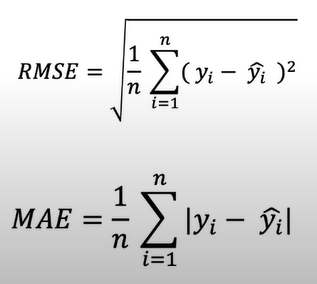

## Parametrelerin Tahmin Edilmesi (Ağırlıkların Bulunması)

* Amaç bize en küçük hatayı verecek "sabit" ve "katsayıları" bulmaktır.

## Doğrusal Regresyon için Gradient Descent

* Makine öğrenmesinden bağımsız olarak bu bir optimizasyon yöntemidir. 
* Amacı bir fonksiyonu minimum yapabilecek parametre değerlerini bulmaktır. 


### Gradient Descent Nasıl Çalışır?

* Gradyanın negatifi olarak tanımlanan "en dik iniş" yönünde iteratif olarak parametre değerlerini güncelleyerek ilgili fonksiyonun minimum değerini verebilecek parametreleri bul. 

* Cost fonksiyonunu minimize edebilecek parametreleri bulmak için kullanılır. 
>>> 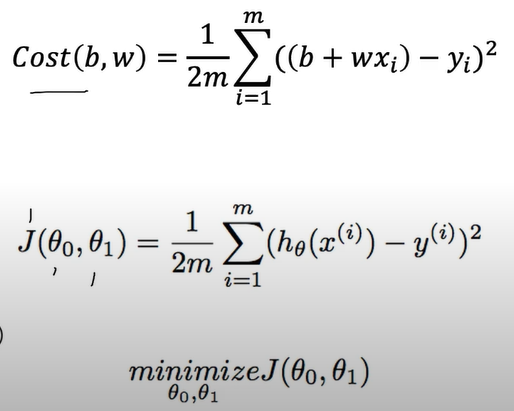


## Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
pd.set_option("display.float_format", lambda x: '%.2f' % x)

In [3]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90


In [4]:
df.shape

(200, 4)

In [5]:
# Temel olarak ilerlemek için 2 değişken seçeceğiz.
# Bu iki değişken arasında simple linear regression modeli kuracağız.
X = df[["TV"]]
y = df[["sales"]]

In [19]:
reg_model = LinearRegression().fit(X, y) # y_hat = b + w*x
y_pred = reg_model.predict(X)
# sabit (b-bias)
print("Sabit -->", reg_model.intercept_[0])

# TV'nin katsayısı (w1)
print("Katsayı -->", reg_model.coef_[0][0])


Sabit --> 7.032593549127693
Katsayı --> 0.047536640433019764


---

### Tahmin İşlemleri

* 150 Birimlik TV harcaması olsa ne kadar satış olur?

> Modelleme sonucu elde ettiğimiz sabit ve katsayı ile denklemimiz şöyle oldu;
>> y_hat = b + w*x --> 7.03 + 0.04*x

> 150 Birimlik TV harcaması için;

>> 7.03 + 0.04*150 = 14.1 olacaktır.

In [11]:
# 150 Birimlik TV harcaması için satış

result = reg_model.intercept_[0] + reg_model.coef_[0][0]*150
result

14.163089614080658

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.00,147.04,85.85,0.70,74.38,149.75,218.82,296.40
radio,200.00,23.26,14.85,0.00,9.97,22.90,36.52,49.60
newspaper,200.00,30.55,21.78,0.30,12.75,25.75,45.10,114.00
sales,200.00,14.02,5.22,1.60,10.38,12.90,17.40,27.00


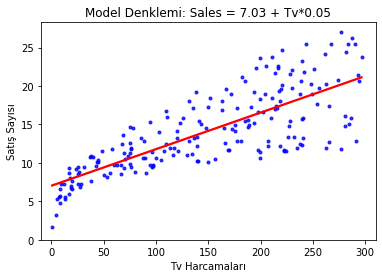

In [17]:
# Modelin Görselleştirilmesi

g = sns.regplot(x=X, y=y, scatter_kws={"color": "b", "s":9},
               ci=False, color="r")
g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0], 2)} + Tv*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("Tv Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

### Tahmin Başarısı

In [21]:
# Tahmin edilen değerler
y_pred = reg_model.predict(X)

# MSE skorumuz
mean_squared_error(y, y_pred)

10.512652915656757

In [23]:
print("Bağımlı Değişken Ortalaması:", y.mean()) # Bağımlı değişkenimizin ortalaması
print("Bağımlı Değişken Standart Sapması:", y.std()) # Bağımlı değişkenimizin ortalaması

Bağımlı Değişken Ortalaması: sales   14.02
dtype: float64
Bağımlı Değişken Standart Sapması: sales   5.22
dtype: float64


* Bağımlı değişkenimizin ortalaması 14 ve standart sapması 5. 
* Bizim bulduğumuz MSE skorumuz 10. Bağımlı değişken ortalamasına bakarak aslında bunun yüksek bir hata skoru olduğunu söyleyebiliriz.

In [24]:
# RMSE

np.sqrt(mean_squared_error(y, y_pred)) # MSE'nin karekökü

3.2423221486546887

In [25]:
# MAE

mean_absolute_error(y, y_pred)

2.549806038927486

* **Bir tane değerlendirme metriği seçtikten sonra modelde yaptığımız her bir değişiklikten sonra aynı metrik üzerindne bir yorum yapmalıyız.**

In [26]:
# R-KARE: Veri setindeki bağımsız değişkenlerin bağımlı değişkeni açıklama yüzdesidir.

reg_model.score(X, y)

0.611875050850071

## Multiple Linear Regression

* Birden fazla bağımsız değişken üzerinden model kuracağız.

In [27]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90


In [28]:
# Modelleme

X = df.drop("sales", axis=1)
y = df[["sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

reg_model = LinearRegression().fit(X_train, y_train)
y_pred = reg_model.predict(X_test)

print("Sabit (b-bias):", reg_model.intercept_)
print("Coefficients (w-weights):", reg_model.coef_)




Sabit (b-bias): [2.90794702]
Coefficients (w-weights): [[0.0468431  0.17854434 0.00258619]]


1.99188555182879

### Tahmin İşlemleri

* Aşağıdaki gözlem değerlerine göre satışın beklenen değeri nedir? 
>> TV: 30  
>> radio: 10  
>> newspaper: 40  

In [29]:
reg_model.intercept_

array([2.90794702])

In [30]:
reg_model.coef_

array([[0.0468431 , 0.17854434, 0.00258619]])

> Sales = 2.90 + TV *0.04 + radio*0.17 + newspaper*0.002
>>> 2.90 + 30 * 0.04 + 10 * 0.17 + 40 * 0.002 = 5.88


In [34]:
# Bu işlemleri fonksiyonlaştırma

yeni_veri = [[30], [10], [40]]
yeni_veri = pd.DataFrame(yeni_veri).T
print(yeni_veri)

reg_model.predict(yeni_veri)

    0   1   2
0  30  10  40


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6.202131]])

### Tahmin Başarısı

In [35]:
# Train RMSE

y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

1.736902590147092

In [36]:
# Train RKARE
reg_model.score(X_train, y_train)

0.8959372632325174

In [37]:
# Test RMSE
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.4113417558581585

* Normalde Test Hatası, Train Hatasından daha yüksek çıkar. Şu an bu senaryo harika...

In [38]:
# Test RKARE

reg_model.score(X_test, y_test)

0.8927605914615384

#### Cross_Validation

In [39]:
# 10 katlı CV RMSE

np.mean(np.sqrt(-cross_val_score(reg_model, X, y, cv=10, scoring="neg_mean_squared_error")))

1.6913531708051797

## Gradient Descent ile Doğrusal Regresyon

* Sıfırdan tamamen kod seviyesinde regresyon modeli kuracağız.

In [40]:
# Cost Function

def cost_function(Y, b, w, X):
    m = len(Y)
    sse = 0
    for i in range(m):
        y_hat = b + w * X[i]
        y = Y[i]
        sse += (y_hat - y)**2
    mse = sse / m
    return mse

In [45]:
# Update_Weights

def update_weights(Y, b, w, X, learning_rate):
    m = len(Y)
    b_deriv_sum = 0
    w_deriv_sum = 0
    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        b_deriv_sum += (y_hat - y)
        w_deriv_sum += (y_hat - y) * X[i]
    new_b = b - (learning_rate * 1 / m * b_deriv_sum)
    new_w = w - (learning_rate * 1 / m * w_deriv_sum)
    return new_b, new_w

In [46]:
# train fonksiyonu
def train(Y, initial_b, initial_w, X, learning_rate, num_iters):

    print("Starting gradient descent at b = {0}, w = {1}, mse = {2}".format(initial_b, initial_w,
                                                                   cost_function(Y, initial_b, initial_w, X)))

    b = initial_b
    w = initial_w
    cost_history = []

    for i in range(num_iters):
        b, w = update_weights(Y, b, w, X, learning_rate)
        mse = cost_function(Y, b, w, X)
        cost_history.append(mse)


        if i % 100 == 0:
            print("iter={:d}    b={:.2f}    w={:.4f}    mse={:.4}".format(i, b, w, mse))


    print("After {0} iterations b = {1}, w = {2}, mse = {3}".format(num_iters, b, w, cost_function(Y, b, w, X)))
    return cost_history, b, w

In [ ]:
# Modelleme

X = df["radio"]
Y = df["sales"]

# hyperparameters
learning_rate = 0.001
initial_b = 0.001
initial_w = 0.001
num_iters = 100000

cost_history, b, w = train(Y, initial_b, initial_w, X, learning_rate, num_iters)


Starting gradient descent at b = 0.001, w = 0.001, mse = 222.9477491673001
iter=0    b=0.01    w=0.3708    mse=53.25
iter=100    b=0.28    w=0.4788    mse=41.6
iter=200    b=0.54    w=0.4709    mse=40.29
iter=300    b=0.79    w=0.4633    mse=39.04
iter=400    b=1.03    w=0.4559    mse=37.87
iter=500    b=1.27    w=0.4487    mse=36.76
iter=600    b=1.49    w=0.4417    mse=35.72
iter=700    b=1.72    w=0.4349    mse=34.73
iter=800    b=1.93    w=0.4283    mse=33.8
iter=900    b=2.14    w=0.4219    mse=32.92
iter=1000    b=2.35    w=0.4157    mse=32.09
iter=1100    b=2.54    w=0.4096    mse=31.3
iter=1200    b=2.74    w=0.4037    mse=30.56
iter=1300    b=2.92    w=0.3980    mse=29.87
iter=1400    b=3.10    w=0.3925    mse=29.21
iter=1500    b=3.28    w=0.3871    mse=28.58
iter=1600    b=3.45    w=0.3818    mse=28.0
iter=1700    b=3.62    w=0.3767    mse=27.44
iter=1800    b=3.78    w=0.3718    mse=26.92
iter=1900    b=3.94    w=0.3670    mse=26.42
iter=2000    b=4.09    w=0.3623    mse=25

# Logistic Regression

* Amaç sınıflandırma problemi için bağımlı ve bağımsız değişkenler arasındaki ilişkiyi doğrusal olarak modellemektir.

>>> 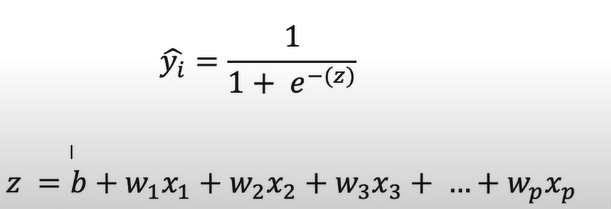

* Nasıl? Gerçek değerler ile tahmin edilen değerler arasındaki farklara ilişkin log loss değerini minimum yapabilecek ağırlıkları bularak. 

>>> 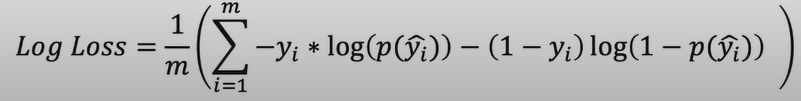

## Logistic Regression için Gradient Descent

>>> 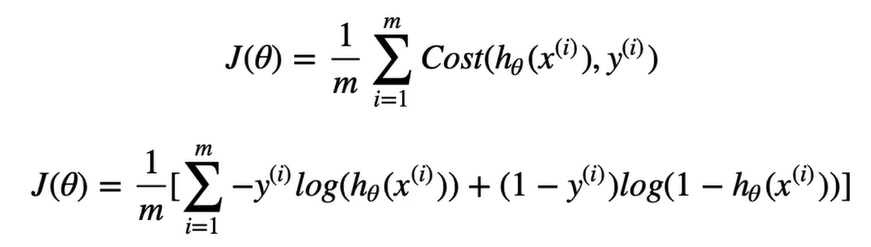

## Sınıflandırma Problemlerinde Başarı Değerlendirme

### Confusion Matrix

>>> 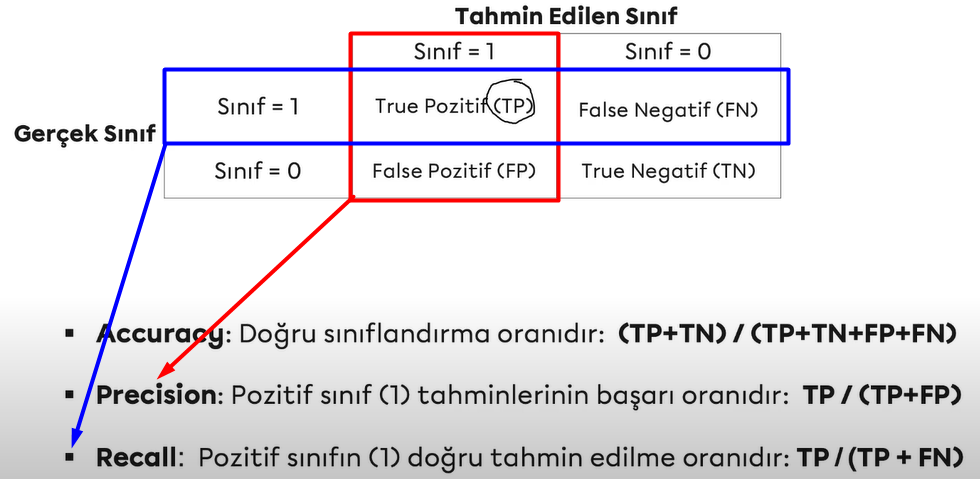

* **Tip 1 Hata:** False Pozitif (FP) yanlış alarm üretmek demektir. Yani gerçekten masum olan birine hırsız demek gibi düşünebiliriz. Bu duruma "Tip 1 Hatası" denir. 

* **Tip 2 Hata:** Gerçekte hırsız olduğu halde masum dediğimiz durumlar vardır. Bu durumlara "Tip 2 Hatası (Kritik Hata)" denir. 

>>> 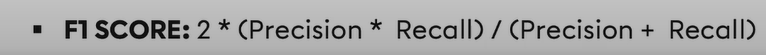  

---

**ÖRNEK:**  

* 1000 Kredi kartı işlemi var. 990 normal işlem. 10 sahtekar işlem. Buna göre Confusion matrisi doldurunuz ve başarı metriklerini hesaplayınız. 

>>> 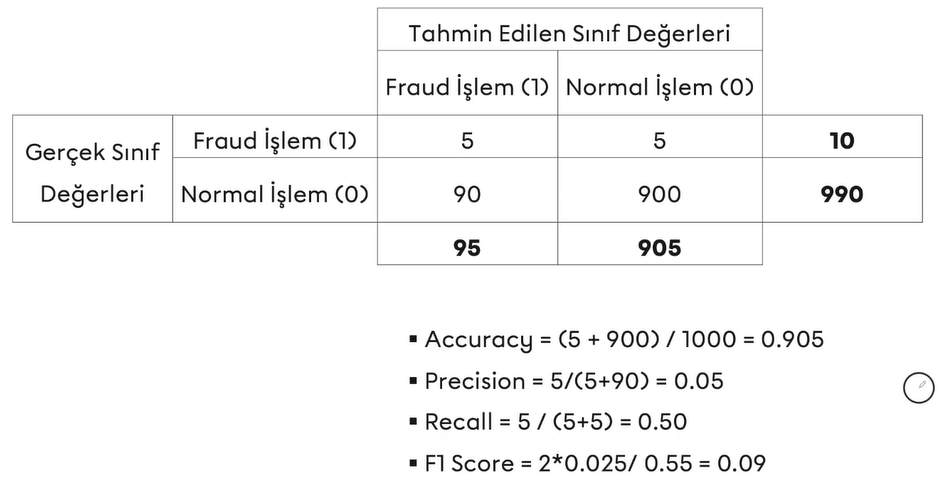

* Sadece "accuracy" değerine bakarak model değerlendirmek yanlış olacaktır. Örnekte de görüldüğü gibi. 
* Sınıflandırma problemlerinde diğer metriklere de bakmanın önemini görmüş olduk.

### Classification Threshold

* Genelde threshold artınca başarılı olma ihtimali azalır. Buna dikkat etmeliyiz.

>>>> 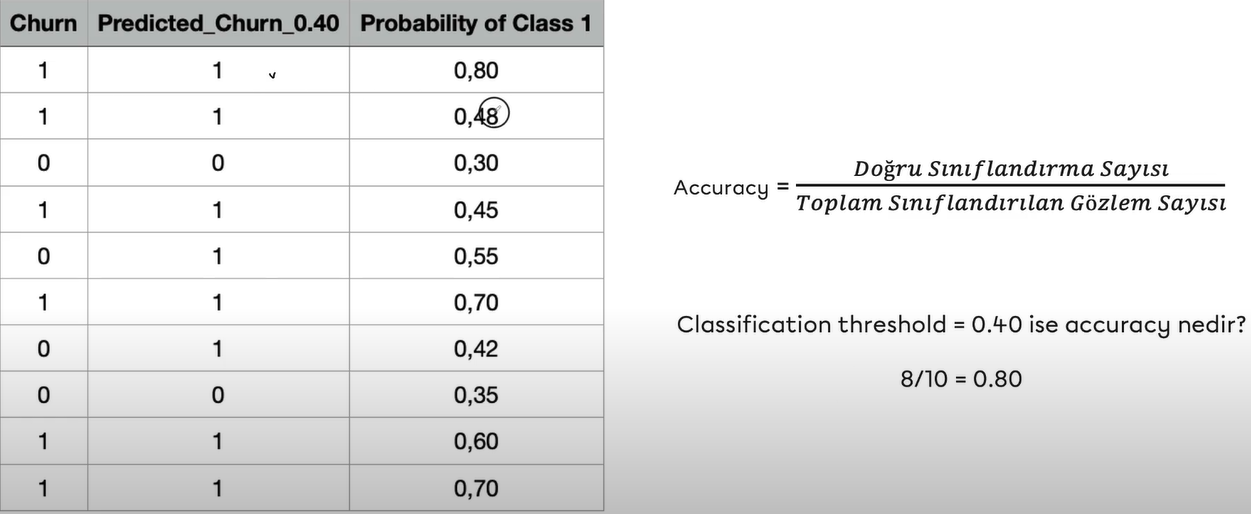

* **Roc Curve:** Olası threhsold değişimlerine karşılık başarı değişimlerini gösterir.

### Roc Curve

>>>> 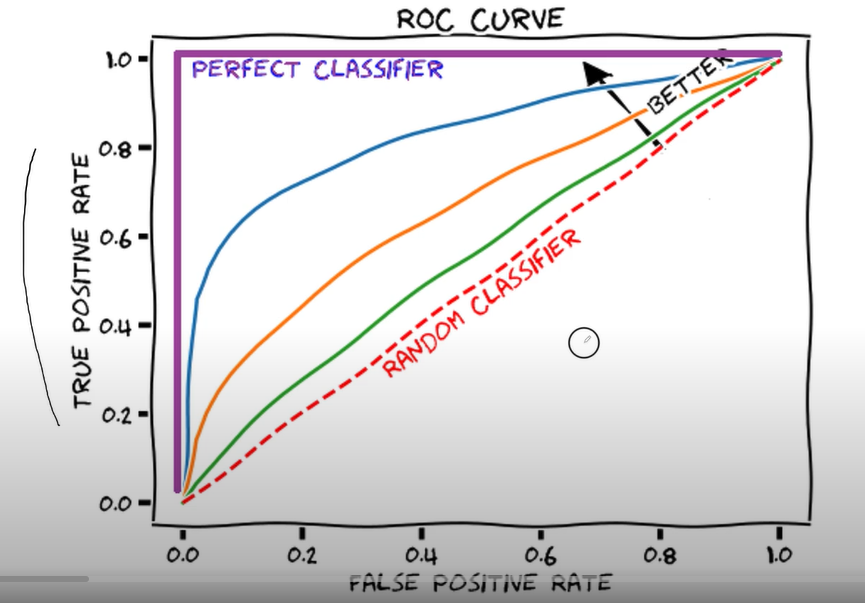

* Olası threshold değerlerine karşılık gelen "True Positive" ve "False Positive" oranlarına bakarak bu "Roc Curve" elde edilir.

* "Roc Curve" altında kalanın integrali alınırsa "Area Under Curve (AUC)" elde edilir. Yani eğri altında kalan alan.
* "AUC", ROC eğrisinin tek sayısa bir değer ile ifade edilişidir. 
* Roc eğrisi altında kalan alandır. 
* "AUC", tüm olası sınıflandırma eşikleri için toplu bir performans ölçüsüdür. 

### Log Loss

* Hem model başarısı hem de optimizasyon yapmak üzere kullanılabilir. 
* Entropi, çeşitliliktir. Entropi, bilgidir. Entropi ne kadar yüksek ise o kadar çeşitlilik vardır. 

* Binary Classification problemleri için kullanılan entropi formu;
>>>> 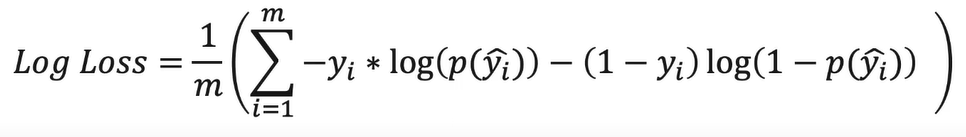

---  


**NOT:** 
* Örneğin 1 olma olasılığı 0.80 olan bir değer 1'e yakın olduğu için aslında bir çeşitlilik yoktur. Yani "Entropi" düşüktür. 

---  



## UYGULAMA

* İş problemi; Özellikleri belirtildiğinde kişilerin diyabet hastası olup olmadıklarını tahmin edebilecek bir makine öğrenmesi modeli geliştiriniz. 


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_validate

In [12]:
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.width", 500)

In [13]:
# Sınırları belirleyen fonksiyon

def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95): # eşik değerlerinie 0.05-0.95 olarak güncelledik.
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [14]:
# Aykırı değer var mı yok mu fonksiyonu

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    filter1 = (dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)
    return dataframe[filter1].any(axis=None) # True/False --> Outlier Var mı? Yok mu?

In [15]:
# Baskılama yöntemi ile doldurma için FONKSİYON

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

### EDA

In [16]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [17]:
df.shape

(768, 9)

#### Target Analizi

In [18]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

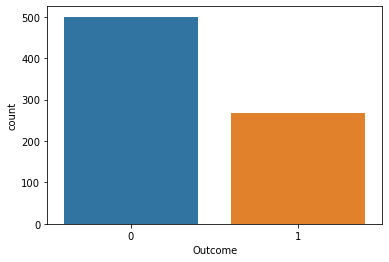

In [19]:
sns.countplot(x="Outcome", data=df)
plt.show()

In [20]:
# Sınıfların veri setindeki oranları

100*df["Outcome"].value_counts() / len(df)

0   65.104
1   34.896
Name: Outcome, dtype: float64

#### Feature'ların Analizi

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


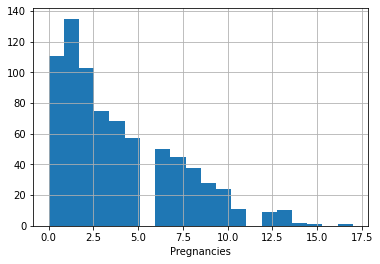

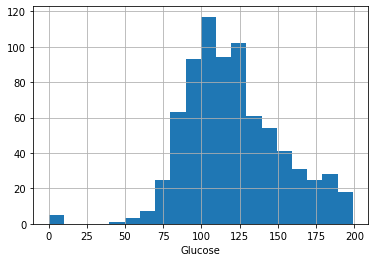

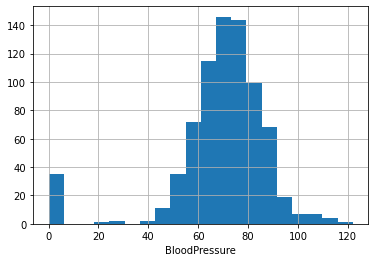

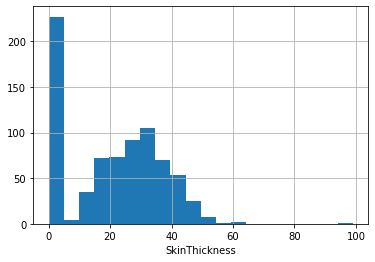

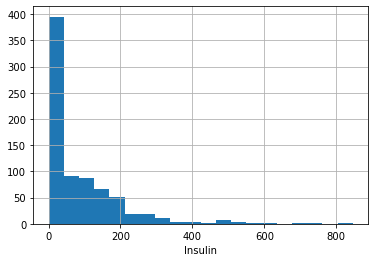

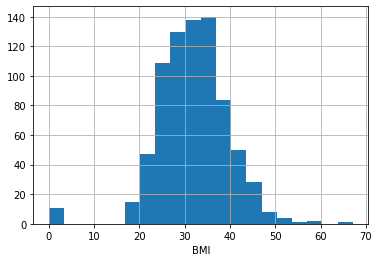

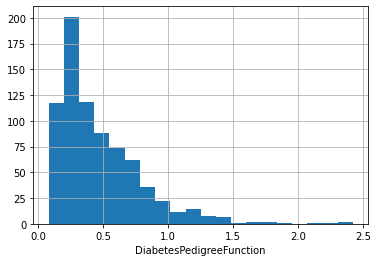

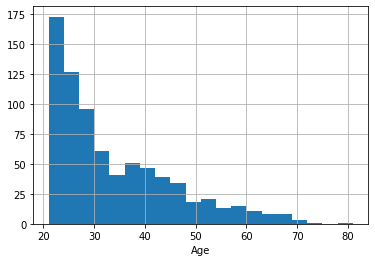

In [27]:
# Nümerik kolonların histogramını almak içini fonksiyon

def plot_numerical_col(dataframe, numerical_col):
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.show(block=True)

cols = [col for col in df.columns if col !="Outcome"] # Bağımlı değişkenimiz dışındakileri tutuyoruz.
for col in cols:
    plot_numerical_col(df, col)



#### Target vs Features

In [28]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298
1,4.866


In [30]:
# Tüm featureları target kırılımında görmek için fonksiyon yazalım

def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}))
    print("\n\n")
    print("#" * 15)

for col in cols:
    target_summary_with_num(df, "Outcome", col)

         Pregnancies
Outcome             
0              3.298
1              4.866



###############
         Glucose
Outcome         
0        109.980
1        141.257



###############
         BloodPressure
Outcome               
0               68.184
1               70.825



###############
         SkinThickness
Outcome               
0               19.664
1               22.164



###############
         Insulin
Outcome         
0         68.792
1        100.336



###############
           BMI
Outcome       
0       30.304
1       35.143



###############
         DiabetesPedigreeFunction
Outcome                          
0                           0.430
1                           0.550



###############
           Age
Outcome       
0       31.190
1       37.067



###############


### Data Preprocessing

In [31]:
df.isnull().sum() # Her ne kadar "NaN" değer gözükmese de Insulin gibi değerler 0 olamaz. Bunları ele alacağız.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [32]:
# Şimdilik bu 0 değerleri ile uğraşmayacağız.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [34]:
# Aykırı değerlere bakalım

for col in cols:
    print(col, check_outlier(df, col)) # 0.05-0.95 threshold'lara göre kontrol ediyor fonksiyonumuz.

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin True
BMI False
DiabetesPedigreeFunction False
Age False


In [35]:
# Sadece Insulin değişkeninde eksik değer var.

replace_with_thresholds(df, "Insulin") # Baskılama yöntemiyle dolduruyoruz

In [36]:
# Tekrar bir aykırı değerlere bakalım

for col in cols:
    print(col, check_outlier(df, col)) # 0.05-0.95 threshold'lara göre kontrol ediyor fonksiyonumuz.
    
# Görüldüğü gibi artık outliers yok.

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False


In [37]:
# Scaling işlemleri

for col in cols:
    df[col] = RobustScaler().fit_transform(df[[col]]) # Her değerden median çıkartıp range değerine bölüyor.
    
# RobustScaler: Aykırı değerlerden etkilenmez. 

In [38]:
df.head() # Scaling gerçekleşmiş

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.600,0.752,0.000,0.375,-0.240,0.172,0.665,1.235,1
1,-0.400,-0.776,-0.333,0.188,-0.240,-0.581,-0.056,0.118,0
2,1.000,1.600,-0.444,-0.719,-0.240,-0.935,0.783,0.176,1
3,-0.400,-0.679,-0.333,0.000,0.499,-0.419,-0.537,-0.471,0
4,-0.600,0.485,-1.778,0.375,1.081,1.194,5.008,0.235,1


### Modelleme

In [41]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

log_model = LogisticRegression().fit(X, y)

print("Sabit değerimiz:", log_model.intercept_)
print("Katsayılarımız (Ağırlıklar): ", log_model.coef_)

Sabit değerimiz: [-1.23439588]
Katsayılarımız (Ağırlıklar):  [[ 0.59906785  1.41770936 -0.23152362  0.01973855 -0.14571255  0.81741997
   0.35522795  0.25655154]]


In [45]:
# Tahminleme

y_pred = log_model.predict(X)

print("Tahmin edilen değerler:", y_pred[:5]) # Tahmin ettiğimiz değerler
print("###")
print("Gerçek değerler:", y[:5]) # Gerçek değerler

Tahmin edilen değerler: [1 0 1 0 1]
###
Gerçek değerler: 0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


### Model Evaluation

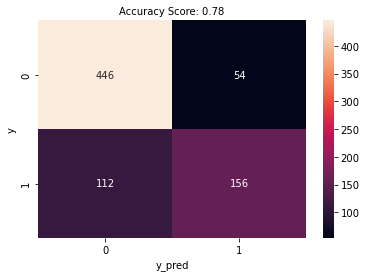

In [47]:
# Confusion matrix için fonksiyon oluşturuyoruz.

def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel("y_pred")
    plt.ylabel("y")
    plt.title(f"Accuracy Score: {acc}", size=10)
    plt.show()
    
plot_confusion_matrix(y, y_pred) # Gerçek değerleri ve tahmin edilen değerleri veriyoruz.

In [50]:
# Bu hesaplamalar classification_report fonksiyonu ile otomatik olark yapılıyor.

print(classification_report(y, y_pred))

# Accuracy: 0.78
# Precision: 0.74
# Recall: 0.58
# F1-score: 0.65

# ROC-AUC
y_prob = log_model.predict_proba(X)[:, 1] # 1 Sınıfının gerçekleşme Olasılıklara erişiyoruz
roc_auc_score(y, y_prob)
# AUC: 0.839

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.58      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.74      0.75       768
weighted avg       0.78      0.78      0.78       768



0.8393955223880598

### Model Validation

#### Holdout

In [53]:
# Holdout yöntemi

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

log_model = LogisticRegression().fit(X_train, y_train)
y_pred = log_model.predict(X_test)

y_prob = log_model.predict_proba(X_test)[:, 1] # 1 sınıfına ait olma olasılıkları

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.77      0.92      0.84        97
           1       0.79      0.53      0.63        57

    accuracy                           0.77       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.78      0.77      0.76       154



0.8755652016639537

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


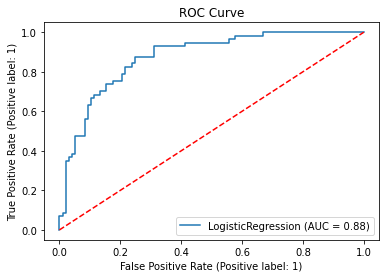

0.8755652016639537

In [54]:
# Roc Curve çizdirelim.

plot_roc_curve(log_model, X_test, y_test)
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1], "r--")
plt.show()

# AUC
roc_auc_score(y_test, y_prob)

#### K-FOLD Cross Validation

In [56]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

log_model = LogisticRegression().fit(X, y)

# Cross Validation uygulaması
cv_results = cross_validate(log_model, X, y, cv=5, scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])


In [57]:
cv_results["test_accuracy"].mean() # Ortalama accuracy

0.7721925133689839

In [58]:
cv_results["test_precision"].mean() # Ortalama precision

0.7192472060223519

In [59]:
cv_results["test_recall"].mean() # Ortalama recall

0.5747030048916841

In [60]:
cv_results["test_f1"].mean() # Ortalama f1

0.6371421090986309

In [61]:
cv_results["test_roc_auc"].mean() # Ortalama roc_auc

0.8327295597484277

In [62]:
# Bir veri üzerinde modelimizi test edelim.

random_user = X.sample(1, random_state=45)
log_model.predict(random_user)
# Girilen featurelara göre bu kişi diyabettir.

array([1], dtype=int64)